In [85]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize #pentru ex1
from scipy.optimize import minimize #pentru ex2
import seaborn as sns #pentru ex3 
from scipy.stats import gaussian_kde #pentru ex7
from sklearn.linear_model import LinearRegression #pentru ex8
from sklearn.metrics import mean_squared_error #pentru ex8
#from scipy.special import binom
import pandas as pd
#import math
#import pickle
#import statsmodels.stats.power
import statsmodels.api as sm
#import statsmodels.stats.multitest as mt
#from sklearn import datasets

# Galton dataset

In [86]:
father_son = pd.read_csv('father_son.csv')
father_son.head()

Unnamed: 0   fheight   sheight
0           1  65.04851  59.77827
1           2  63.25094  63.21404
2           3  64.95532  63.34242
3           4  65.75250  62.79238
4           5  61.13723  64.28113

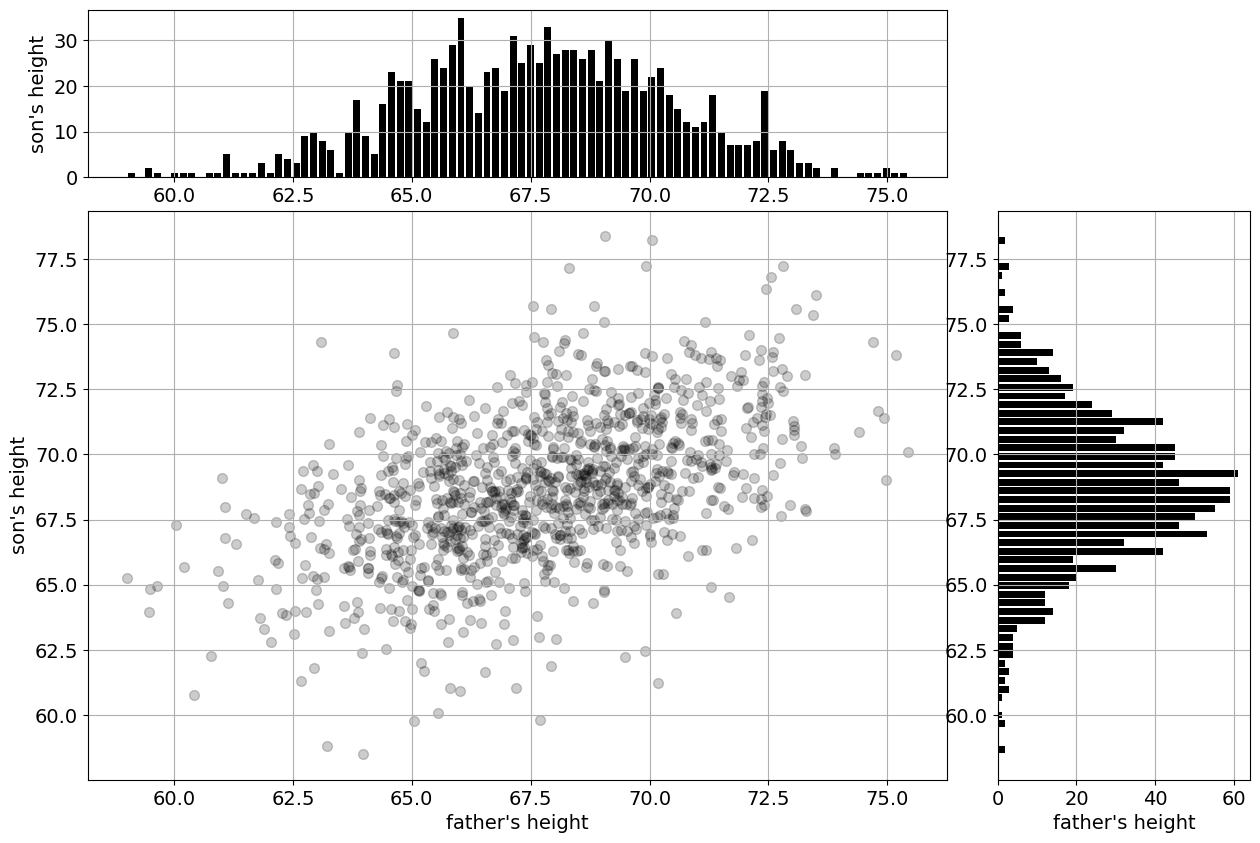

In [87]:
# see https://stackoverflow.com/questions/37008112/matplotlib-plotting-histogram-plot-just-above-scatter-plot

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

plt.rcParams.update({'font.size': 14})

fheight = father_son['fheight'].values
sheight = father_son['sheight'].values

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(4, 4)
ax_main = plt.subplot(gs[1:4, :3])
ax_fDist = plt.subplot(gs[0, :3],sharex=ax_main)
ax_sDist = plt.subplot(gs[1:4, 3],sharey=ax_main)

ax_main.scatter(fheight, sheight, c='k', alpha = .2, s=50)
ax_main.set(xlabel="father's height", ylabel="son's height")
ax_main.grid(True)

ax_fDist.hist(fheight, bins=90, align='mid', rwidth=0.8, color='k')
ax_fDist.set(ylabel="son's height")
ax_fDist.grid(True)

ax_sDist.hist(sheight, bins=60, orientation='horizontal', align='mid', rwidth=0.8, color='k')
ax_sDist.set(xlabel="father's height")
ax_sDist.grid(True)

plt.show()

In [88]:
x = np.random.randn(10) + 6
y = x/3 + np.random.randn(10)/1.5 - 2
x1 = np.array(range(11))

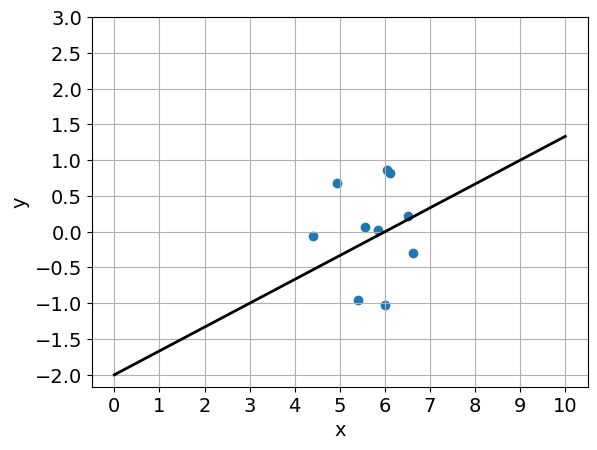

In [89]:
plt.scatter(x, y)
plt.plot(x1, x1/3 - 2, '-', c='k', lw=2)
plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

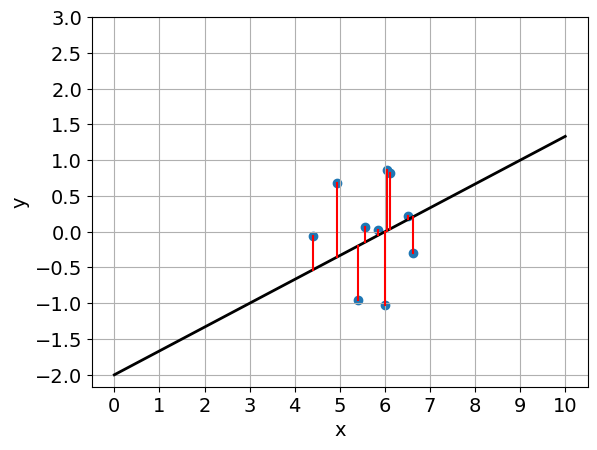

In [90]:
def f(x):
    return x/3 - 2

yf = f(x)
plt.scatter(x, y)
plt.plot(x1, f(x1), '-', c='k', lw=2)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]

plt.xticks(x1)
plt.yticks(np.linspace(-2, 3, 11))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

beta0: 33.88660435407793 beta1: 0.5140930386233074
intercept: 33.88660435407814 coefficient: 0.5140930386233072


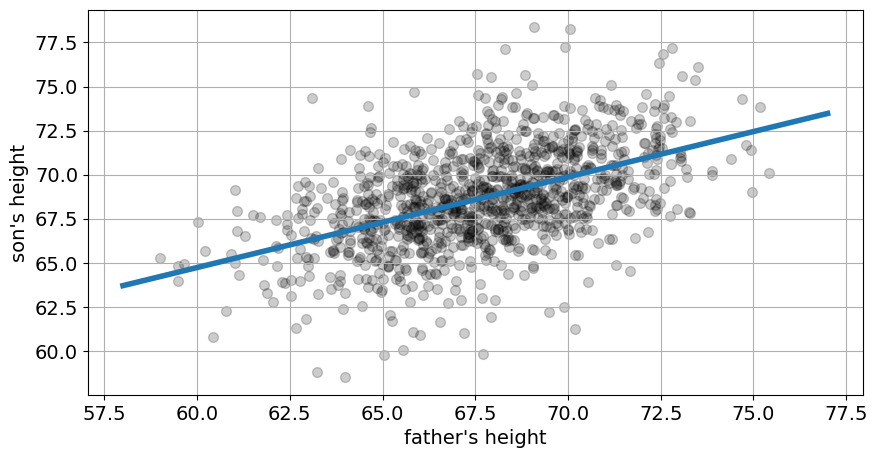

In [91]:
# see https://machinelearningmastery.com/introduction-to-expected-value-variance-and-covariance/

x, y = np.array(fheight), np.array(sheight)
beta1 = np.corrcoef(x, y)[0, 1] * np.std(y)/np.std(x)
beta0 = np.mean(y) - beta1 * np.mean(x)
print('beta0:', beta0, 'beta1:', beta1)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
print('intercept:', lm.params[0], 'coefficient:', lm.params[1])

x1 = np.linspace(58, 77, 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=4)
ax.set(xlabel="father's height", ylabel="son's height")
ax.grid(True)
plt.show()

# Regresia catre medie

In [92]:
x = np.random.randn(10)
ordered = np.argsort(x)[::-1]

y = np.random.randn(10)

# doar in 1 caz din 11 vom obtine un numar mai mic
print(x[ordered[0]], '>', y[ordered[0]])

2.060747924881987 > -1.183258512665775


In [93]:
# verificare
n = 10000000
x = np.random.randn(n, 10)
ordered = np.argsort(x, axis=1)
for i in range(x.shape[0]):
    x[i, :] = x[i, ordered[i][::-1]]

y = np.random.randn(n, 10)
print(np.sum(x[:, 0] < y[:, 0]) / n, 'vs. 1/11 =', 1/11)

0.0909838 vs. 1/11 = 0.09090909090909091


rho: 0.5013383111723432


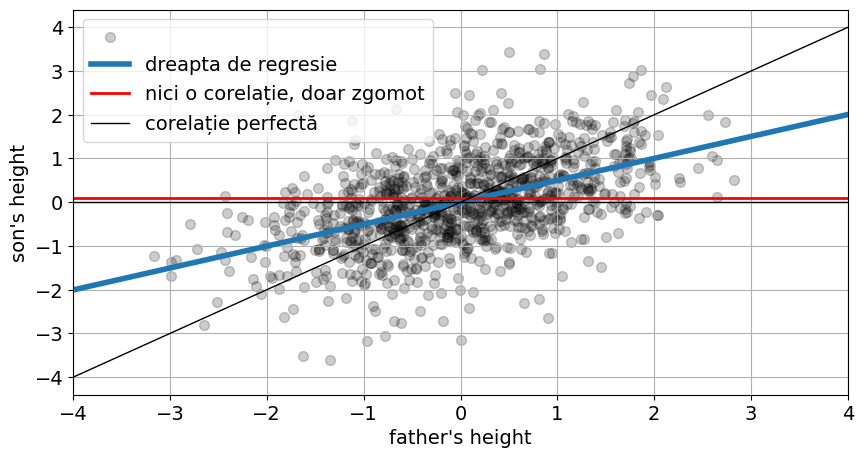

In [94]:
# originea este acum (Xbar, Ybar)
x, y = np.array(fheight), np.array(sheight)
x, y = (x - np.mean(x))/np.std(x), (y - np.mean(y))/np.std(y)
rho = np.corrcoef(x, y)[0, 1]
print('rho:', rho)

x1 = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, rho * x1, lw=4)
ax.plot([4, -4], [0.1, 0.1], 'r', lw=2)
ax.plot(x1, x1, lw=1, c='k')
ax.plot(x1, [0] * len(x1), lw=1, c='k')
ax.legend(['', 'dreapta de regresie', 'nici o corela»õie, doar zgomot', 
           'corela»õie perfectƒÉ'])
ax.set(xlabel="father's height", ylabel="son's height", xlim=(-4, 4))
ax.grid(True)
plt.show()

# Laborator

__Q1__. ConsiderƒÉm setul $X = \{0.725, 0.429, -0.372, 0.863\}$. Ce valoare a lui $\mu$ minimizeazƒÉ $\sum_i (X_i - \mu)^2$ ? Verifica»õi cu c√¢teva valori √Æn jur.

In [95]:
X = np.array([0.725, 0.429, -0.372, 0.863])

mu = np.mean(X)

def objective_function(mu): # functia obiectiv pe care o minimizam (suma patratelor diferentelor)
    return np.sum((X - mu)**2) 

result = optimize.minimize_scalar(objective_function) # minimizam functia obiectiv 

print("Valoarea lui mu care minimizeaza functia obiectiv este:", result.x)

print("Verificare cu valori √Æn jur:")
for mu in np.linspace(result.x - 0.1, result.x + 0.1, num=21): # verificare cu valori in jur
    # alegerea unui interval mic reduce numƒÉrul de calcule necesare, fƒÉc√¢nd verificarea rapidƒÉ »ôi eficientƒÉ din punct de vedere al resurselor de calcul
    print("mu =", round(mu, 4), " -> func»õia obiectiv =", round(objective_function(mu), 6)) # valoarea functiei obiectiv


Valoarea lui mu care minimizeaza functia obiectiv este: 0.4112500000000001
Verificare cu valori √Æn jur:
mu = 0.3113  -> func»õia obiectiv = 0.956313
mu = 0.3213  -> func»õia obiectiv = 0.948713
mu = 0.3313  -> func»õia obiectiv = 0.941913
mu = 0.3413  -> func»õia obiectiv = 0.935913
mu = 0.3513  -> func»õia obiectiv = 0.930713
mu = 0.3613  -> func»õia obiectiv = 0.926313
mu = 0.3713  -> func»õia obiectiv = 0.922713
mu = 0.3813  -> func»õia obiectiv = 0.919913
mu = 0.3913  -> func»õia obiectiv = 0.917913
mu = 0.4013  -> func»õia obiectiv = 0.916713
mu = 0.4113  -> func»õia obiectiv = 0.916313
mu = 0.4213  -> func»õia obiectiv = 0.916713
mu = 0.4313  -> func»õia obiectiv = 0.917913
mu = 0.4413  -> func»õia obiectiv = 0.919913
mu = 0.4513  -> func»õia obiectiv = 0.922713
mu = 0.4613  -> func»õia obiectiv = 0.926313
mu = 0.4713  -> func»õia obiectiv = 0.930713
mu = 0.4813  -> func»õia obiectiv = 0.935913
mu = 0.4913  -> func»õia obiectiv = 0.941913
mu = 0.5013  -> func»õia obiectiv = 0.94

__Q2__. Pentru problema anterioarƒÉ, considerƒÉm cƒÉ se dƒÉ un set de ponderi $w = \{2, 2, 1, 1\}$. Dorim sƒÉ minimizƒÉm suma $\sum_i w_i(x-\mu)^2$. Ce valoare pentru $\mu$ ob»õinem?

In [96]:
x = np.array([0.725, 0.429, -0.372, 0.863]) 
w = np.array([2, 2, 1, 1])

def objective_function(mu): # functia obiectiv pe care o minimizam (suma patratelor diferentelor)
    return np.sum(w * (x - mu)**2) # ponderile sunt aplicate la fiecare termen 

result = minimize(objective_function, x.mean()) 
print("Valoarea lui ùúá care minimizeazƒÉ func»õia obiectiv este:", round(result.x[0], 4)) 

Valoarea lui ùúá care minimizeazƒÉ func»õia obiectiv este: 0.4665


__Q3__. Pentru setul Galton (fathers.sons):
    
a) gƒÉsi»õi media, devia»õia standard »ôi corela»õia dintre √ÆnƒÉl»õimile pƒÉrin»õilor »ôi cele ale fiilor.
b) centra»õi variabilele pentru fii »ôi pƒÉrin»õi »ôi verifica»õi cƒÉ variabilele centrate au media 0.
c) realiza»õi acela»ôi lucru pentru devia»õia standard »ôi verifica»õi cƒÉ ea devine 1.
d) realiza»õi procedura completƒÉ de normalizare (centrare + scalare) »ôi verifica»õi $N(0, 1)$.

Rezolvare a)
------------
fheight_mean: 67.69
fheight_std: 2.74
sheight_mean: 68.68
sheight_std: 2.81
corelatia 0.50


Rezolvare b)
------------
media variabilei centrate pentru inaltimea parintilor: -0.0000000000
media variabilei centrate pentru inaltimea fiilor: 0.0000000000


Rezolvare c)
------------
deviatia standard father: 1.0000000000
deviatia standard son 1.0000000000


Rezolvare d)
------------


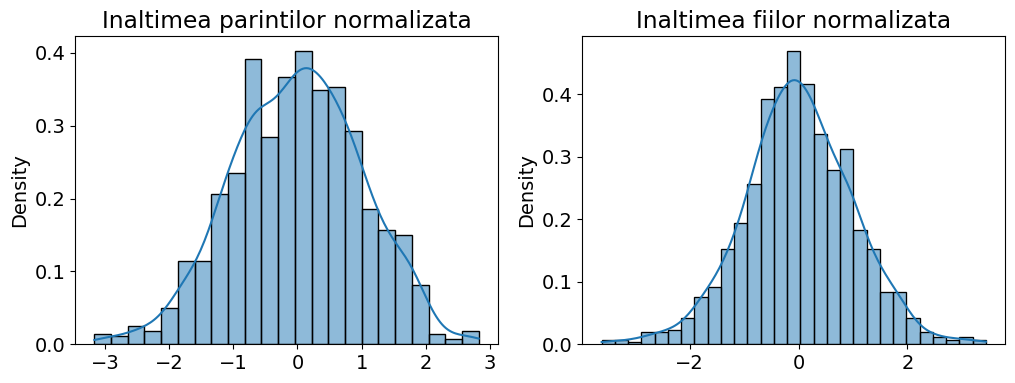

Media variabilei normalizate father: -0.0000000000
Deviatia standard a variabilei normalizate father: 1.0000000000
Media variabilei normalizate son: 0.0000000000
Deviatia standard a variabilei normalizate son: 1.0000000000


In [97]:
print ("Rezolvare a)\n------------");

father_son = pd.read_csv('father_son.csv') 

fheight = father_son['fheight'].values # inaltimea parintilor
sheight = father_son['sheight'].values # inaltimea fiilor

#media si deviatia standard father
fheight_mean = np.mean(fheight) # media inaltimii parintilor
fheight_std = np.std(fheight) # deviatia standard a inaltimii parintilor

# mediei si deviatia standard son
sheight_mean = np.mean(sheight) # media inaltimii fiilor
sheight_std = np.std(sheight) # deviatia standard a inaltimii fiilor

#corelatia
corr = np.corrcoef(fheight, sheight)[0, 1] # corelatia dintre inaltimea parintilor si a fiilor
#elementele pe diagonala principalƒÉ sunt 1 (deoarece orice variabilƒÉ este perfect corelatƒÉ cu ea √ÆnsƒÉ»ôi),
# iar valorile de pe pozi»õiile [0, 1] »ôi [1, 0] sunt coeficientul de corela»õie √Æntre fheight »ôi sheight.

print("fheight_mean: {:.2f}".format(fheight_mean))
print("fheight_std: {:.2f}".format(fheight_std))
print("sheight_mean: {:.2f}".format(sheight_mean))
print("sheight_std: {:.2f}".format(sheight_std))
print("corelatia {:.2f}".format(corr))
print ("\n\nRezolvare b)\n------------");

# centram variabilele, adica scadem media variabilei de la fiecare valoare a variabilei si obtinem media 0
fheight_centered = fheight - np.mean(fheight) # inaltimea parintilor centrate
sheight_centered = sheight - np.mean(sheight) # inaltimea fiilor centrate


# verificare
print("media variabilei centrate pentru inaltimea parintilor: {:.10f}".format(np.mean(fheight_centered)))
print("media variabilei centrate pentru inaltimea fiilor: {:.10f}".format(np.mean(sheight_centered)))


print ("\n\nRezolvare c)\n------------");

# centrare variabilele 
fheight_centered = fheight - np.mean(fheight)
sheight_centered = sheight - np.mean(sheight)

# standardizare variabilele 
fheight_standardized = fheight_centered / np.std(fheight) # inaltimea parintilor standardizata
sheight_standardized = sheight_centered / np.std(sheight) # inaltimea fiilor standardizata

# verificare
print("deviatia standard father: {:.10f}".format(np.std(fheight_standardized)))
print("deviatia standard son {:.10f}".format(np.std(sheight_standardized)))


print ("\n\nRezolvare d)\n------------");
#normalizarea inseamna sa standardizam variabilele si apoi sa le centram
# standardizare variabilele centrate
fheight_normalized = (fheight_centered / np.std(fheight)) # inaltimea parintilor normalizata
sheight_normalized = (sheight_centered / np.std(sheight)) # inaltimea fiilor normalizata

# verificare distributia variabilelor standardizate
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
#√én loc sƒÉ arate frecven»õele prin bare, cum face o histogramƒÉ clasicƒÉ, 
#KDE traseazƒÉ o linie care aratƒÉ zonele cu cea mai mare concentra»õie de date »ôi cum aceasta variazƒÉ
sns.histplot(fheight_normalized, ax=axs[0], kde=True, stat='density') #axs[0] - primul subplot
sns.histplot(sheight_normalized, ax=axs[1], kde=True, stat='density') #axs[1] - al doilea subplot
axs[0].set_title('Inaltimea parintilor normalizata')
axs[1].set_title('Inaltimea fiilor normalizata')
plt.show()

# verificare medie si deviatie standard 
print("Media variabilei normalizate father: {:.10f}".format(np.mean(fheight_normalized)))
print("Deviatia standard a variabilei normalizate father: {:.10f}".format(np.std(fheight_normalized)))
print("Media variabilei normalizate son: {:.10f}".format(np.mean(sheight_normalized)))
print("Deviatia standard a variabilei normalizate son: {:.10f}".format(np.std(sheight_normalized)))


__Q4__. ConsiderƒÉm un dataset pentru care devia»õia standard a variabilei prezise este dublu fa»õƒÉ de devia»õia standard a predictorului sƒÉu. Variabilele au o corela»õie de 0.3. DacƒÉ potrivim un model de regresie liniarƒÉ, care va fi panta estimatƒÉ?

In [98]:
sy = 2 #deviatia standard a variabilei y
sx = 1 #deviatia standard a variabilei x; am ales-o arbitrar
corelatie = 0.3 #corelatia dintre x si y

panta = corelatie * (sy / sx) #formula pentru panta : corelatia * (deviatia standard a y / deviatia standard a x)
print("Panta estimatƒÉ:", panta)

Panta estimatƒÉ: 0.6


Q5. Pentru problema anterioarƒÉ, variabila prezisƒÉ are o medie 1 iar predictorul o medie de 0.5. Care este intercept-ul?

In [99]:
sy = 2 #deviatia standard a variabilei y
sx = 1 #deviatia standard a variabilei x 
corelatie = 0.3
y_mean = 1 # media variabilei prezise y
x_mean = 0.5 # valoarea medie a variabilei predictor x

panta = corelatie * (sy / sx)
intercept = y_mean - panta * x_mean # formula pentru interceptul dreptei de regresie : media variabilei y - panta * media variabilei x

print("Interceptul este:", intercept)

Interceptul este: 0.7


Q6. Avem douƒÉ c√¢ntare care au asociat zgomot, »ôi mai mul»õi oameni pe care vrem sƒÉ-i c√¢ntƒÉrim. Vom c√¢ntƒÉri fiecare persoanƒÉ pe ambele c√¢ntare. Corela»õia este de 0.75. Fiecare set de mƒÉsurƒÉtori este normalizat. Masa cuiva este la 2 devia»õii standard peste medie √Æn primul grup de c√¢ntƒÉriri. La c√¢te devia»õii standard fa»õƒÉ de medie estimƒÉm cƒÉ este masa corespondentƒÉ √Æn al doilea grup?

In [100]:
#normalizare =  (media = 0, devia»õia standard = 1)
x_1 = 2 #masa normalizatƒÉ a persoanei √Æn primul set de c√¢ntƒÉriri
s_1 = 1 #devia»õia standard a mƒÉsurƒÉtorilor din primul set de c√¢ntƒÉriri
mu_1 = 0 #media mƒÉsurƒÉtorilor din primul set de c√¢ntƒÉriri (setul de mƒÉsurƒÉtori este normalizat)
s_2 = 1 #devia»õia standard a mƒÉsurƒÉtorilor din al doilea set de c√¢ntƒÉriri
mu_2 = 0 #media mƒÉsurƒÉtorilor din al doilea set de c√¢ntƒÉriri (setul de mƒÉsurƒÉtori este normalizat)
corelatia = 0.75

#formula am dedus-o din formulele de mai sus
x_2 = corelatia * (s_2 / s_1) * x_1 + (mu_2 - corelatia * (s_2 / s_1) * mu_1) 

print("Masa corespondentƒÉ din al doilea set de c√¢ntƒÉriri este:", x_2, "devia»õii standard peste medie.")
# se reflectƒÉ faptul cƒÉ, √Æn ciuda unei corela»õii puternice, existƒÉ o micƒÉ incertitudine sau varia»õie introdusƒÉ de zgomotul diferit asociat fiecƒÉrui c√¢ntar.

Masa corespondentƒÉ din al doilea set de c√¢ntƒÉriri este: 1.5 devia»õii standard peste medie.


Q7. ConsiderƒÉm urmƒÉtorul dataset, √Æn care √ÆncercƒÉm sƒÉ prezicem Y pe baza lui X:

In [101]:
x = np.array([8.63, 11.23, 9.73, 11.89, 10.25, 14.12, 11.24, 13.59, 13.86, 13.09, 12.05, 13.46, 13.45, 12.71, 15.08, 14.93,
     14.6, 15.73, 15.39, 16.37, 17.65, 15.44, 17.62, 17.44, 16.63, 17.23, 19.07, 19.19, 19.71, 18.39, 18.68, 19.09,
     19.71, 20.52, 19.49, 21.85, 20.3, 22.38, 20.81, 20.44, 21.09, 21.85, 22.09, 22.75, 23.8, 21.03, 25.08, 23.51,
     25.67, 25.01])
y = np.array([15.61, 16.89, 17.24, 15.41, 17.03, 16.56, 17.26, 17.84, 20.56, 21.95, 20.54, 18.66, 20.98, 22.22, 22.39, 
     21.91, 22.17, 23.83, 24.19, 24.7, 25.92, 25.78, 23.4, 26.36, 25.68, 26.02, 27.42, 26.92, 27.81, 30.12, 29.2,
     30.63, 28.79, 30.07, 30.94, 32.35, 31.85, 30.93, 32.34, 33.28, 33.02, 32.9, 34.53, 34.57, 34.66, 34.48, 36.12,
     35.53, 37.56, 36.58])

a) determina»õi media »ôi devia»õia standard pentru fiecare set X »ôi Y;

b) reprezenta»õi printr-un scatterplot Y func»õie de X, »ôi pe laturi densitƒÉ»õile de probabilitate pentru X »ôi Y (ave»õi exemplu mai sus, al treilea frame, sub "Galton dataset");

c) determina»õi coeficientul de corela»õie dintre cele douƒÉ seturi;

d) 'fabrica»õi' douƒÉ seturi de date pentru care coeficientul de corela»õie sƒÉ vƒÉ dea zero (sau c√¢t mai apropiat de zero); reprezenta»õi √Æntr-un scatter plot;

e) 'fabrica»õi' douƒÉ seturi de date pentru care coeficientul de corela»õie sƒÉ vƒÉ dea 1, fƒÉrƒÉ ca seturile sƒÉ fie identice; reprezenta»õi √Æntr-un scatter plot;

f) determina»õi corela»õia pentru problema ini»õialƒÉ, precum »ôi intercept-ul. Calcula»õi dreapta de regresie prin cele douƒÉ metode (manual »ôi cu metoda statmodels.OLS), »ôi reprezenta»õi-o.

a) determina»õi media »ôi devia»õia standard pentru fiecare set X »ôi Y;


In [102]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

print("X mean:", x_mean)
print("Y mean:", y_mean)
print("X standard deviation:", x_std)
print("Y standard deviation:", y_std)

X mean: 17.4984
Y mean: 26.473999999999997
X standard deviation: 4.321086141238103
Y standard deviation: 6.381005249958662


b) reprezenta»õi printr-un scatterplot Y func»õie de X, »ôi pe laturi densitƒÉ»õile de probabilitate pentru X »ôi Y (ave»õi exemplu mai sus, al treilea frame, sub "Galton dataset");

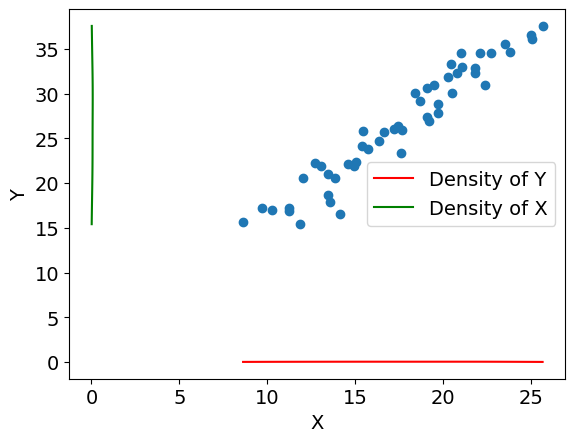

In [103]:
# densitatile de probabilitate
x_density = gaussian_kde(x) #densitatea de probabilitate a variabilei x
y_density = gaussian_kde(y) #densitatea de probabilitate a variabilei y

# grid
x_grid = np.linspace(np.min(x), np.max(x), 100)
y_grid = np.linspace(np.min(y), np.max(y), 100)

# plot
plt.scatter(x, y)
plt.plot(x_grid, y_density(y_grid), label='Density of Y', c='r')
plt.plot(x_density(x_grid), y_grid, label='Density of X', c='g')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

c) determina»õi coeficientul de corela»õie dintre cele douƒÉ seturi;

In [104]:
corr = np.corrcoef(x, y)[0,1]

print("Coeficientul de corela»õie este:", corr)

Coeficientul de corela»õie este: 0.9638387722596928


d) 'fabrica»õi' douƒÉ seturi de date pentru care coeficientul de corela»õie sƒÉ vƒÉ dea zero (sau c√¢t mai apropiat de zero); reprezenta»õi √Æntr-un scatter plot;


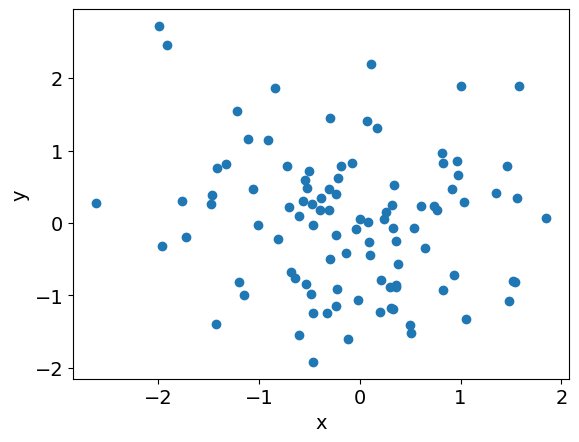

-0.1364222121700025


In [105]:
np.random.seed(42)

x = np.random.normal(loc=0, scale=1, size=100) #generam 100 de valori aleatoare dintr-o distributie normala cu media 0 si deviatia standard 1
y = np.random.normal(loc=0, scale=1, size=100) 
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
corr = np.corrcoef(x, y)[0,1]

# C√¢nd se calculeazƒÉ coeficientul de corela»õie intre x si y, se a»ôteaptƒÉ sƒÉ fie aproape de zero, 
# deoarece nu existƒÉ nicio rela»õie sistematicƒÉ √Æntre cele douƒÉ seturi de date; fiecare punct din x este independent de fiecare
# punct din y.

# Un scatter plot al acestor date aratƒÉ distribu»õia punctelor »ôi, fƒÉrƒÉ nicio corela»õie vizibilƒÉ,
# punctele ar trebui sƒÉ fie dispersate aleatoriu √Æn grafic. 

print(corr);

e) 'fabrica»õi' douƒÉ seturi de date pentru care coeficientul de corela»õie sƒÉ vƒÉ dea 1, fƒÉrƒÉ ca seturile sƒÉ fie identice; reprezenta»õi √Æntr-un scatter plot;


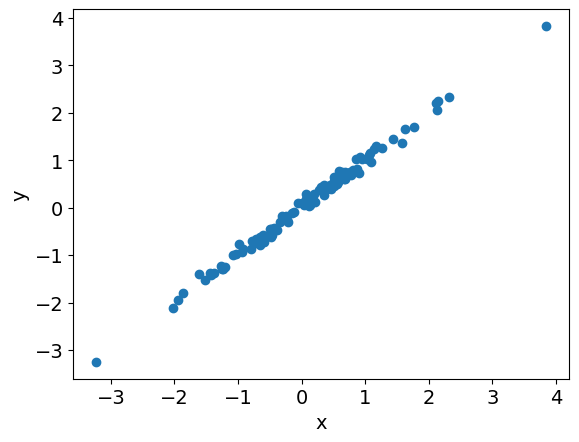

0.9966921314674089


In [106]:
x = np.random.normal(loc=0, scale=1, size=100)
y = x.copy()

#zgomot aleator
y += np.random.normal(loc=0, scale=0.1, size=100) #se adaugƒÉ o valoare aleatoare micƒÉ, extrasƒÉ dintr-o distribu»õie normalƒÉ cu media 0 »ôi devia»õia standard 0.1.
#Setul y este derivat din x prin adƒÉugarea unui zgomot aleator mic, ceea ce introduce o varia»õie, 
#dar pƒÉstreazƒÉ o rela»õie liniarƒÉ str√¢nsƒÉ √Æntre cele douƒÉ seturi de date.

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(np.corrcoef(x, y)[0,1])

f) determina»õi corela»õia pentru problema ini»õialƒÉ, precum »ôi intercept-ul. Calcula»õi dreapta de regresie prin cele douƒÉ metode (manual »ôi cu metoda statmodels.OLS), »ôi reprezenta»õi-o

r = 0.9966921314674089
intercept = 0.010685382879556445

Metoda manuala


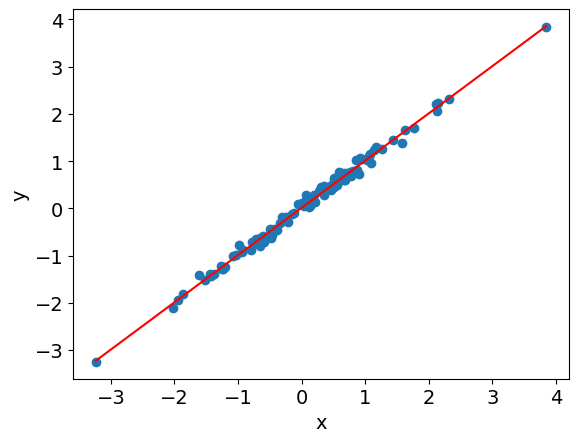

Metoda statmodels.OLS


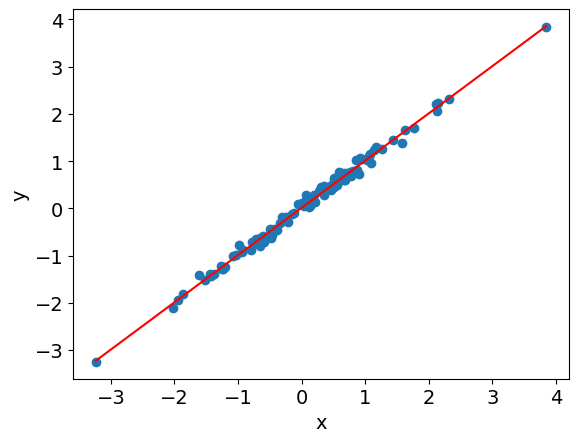

In [107]:
#coeficientul de corelatie - o valoare apropiatƒÉ de 1 indicƒÉ o rela»õie liniarƒÉ puternicƒÉ √Æntre x »ôi y
r = np.corrcoef(x, y)[0, 1]
print("r =",r)

#interceptul si panta liniei de regresie
slope, intercept = np.polyfit(x, y, 1)
print("intercept =",intercept)

print("\nMetoda manuala");

#b1= ‚àë(xi - xÃÑ)(yi - »≥) / ‚àë(xi - xÃÑ)¬≤
#b0= »≥ - Œ≤1xÃÑ
b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1) # panta calculatƒÉ folosind formula de corela»õie bazatƒÉ pe covarian»õƒÉ »ôi varian»õƒÉ.
b0 = np.mean(y) - b1 * np.mean(x) #interceptul 


plt.scatter(x, y)
plt.plot([min(x), max(x)], [b0 + b1 * min(x), b0 + b1 * max(x)], 'r') #linia de regresie:
#Linia √Æncepe de la minimul valorilor lui x p√¢nƒÉ la maximul valorilor lui x , calcul√¢nd valorile corespunzƒÉtoare lui 
# y folosind formula regresiei liniare »≥ = b0 + b1 √ó x, unde b0 este interceptul »ôi b1 este panta. Linia este coloratƒÉ √Æn ro»ôu ('r').
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Metoda statmodels.OLS")


X = sm.add_constant(x) # adaugam o coloana de 1(de obicei) la x pentru a calcula interceptul


model = sm.OLS(y, X).fit() # modelul de regresie liniarƒÉ
b0, b1 = model.params # Extrage coeficien»õii modelului ajustat, interceptul »ôi panta


plt.scatter(x, y)
plt.plot([min(x), max(x)], [b0 + b1 * min(x), b0 + b1 * max(x)], 'r') 
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Acest exerci»õiu are scopul de a demonstra cum se poate utiliza regresia liniarƒÉ pentru a modela rela»õia
# dintre douƒÉ variabile »ôi pentru a √Æn»õelege cum una dintre variabile poate fi folositƒÉ pentru a prezice
# sau estima valoarea celeilalte.

Q8. Folosi»õi setul mtcars.csv. Realiza»õi o regresie liniarƒÉ cu consumul (miles per gallon) ca variabilƒÉ prezisƒÉ pe baza puterii motorului (horsepower). Realiza»õi scatter plot-ul »ôi trasa»õi dreapta de regresie. Care este eroarea pƒÉtraticƒÉ medie (RMS) dintre valorile de consum reale »ôi valorile prezise?

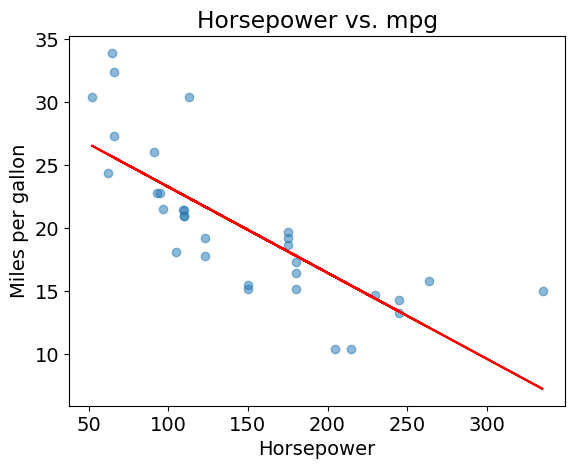

 eroarea pƒÉtraticƒÉ medie (RMS) : 3.7402970868994894


In [108]:
df = pd.read_csv('mtcars.csv')

X = df['hp'].values.reshape(-1,1)  # horsepower, variabila independentƒÉ(puterea motorului) 
y = df['mpg'].values.reshape(-1,1) # miles per gallon (mpg), variabila dependentƒÉ (consumul de combustibil)

model = LinearRegression() # modelul de regresie liniarƒÉ; cum variazƒÉ consumul de combustibil √Æn func»õie de puterea motorului
model.fit(X, y) # ajustarea modelului folosind datele extrase.
# Modelul va √Æncerca sƒÉ stabileascƒÉ o rela»õie liniarƒÉ √Æntre aceste douƒÉ variabile, 
# cu scopul de a prezice consumul de combustibil pe baza puterii motorului. 
# Acest lucru implicƒÉ gƒÉsirea unei linii drepte (panta »ôi interceptul) care sƒÉ descrie cel mai bine 
# cum variazƒÉ mpg c√¢nd hp se schimbƒÉ.

y_pred = model.predict(X) # prezicerea valorilor mpg folosind modelul ajustat

plt.scatter(X, y, alpha=0.5) 
plt.plot(X, y_pred, color='red')
plt.title('Horsepower vs. mpg')
plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()


mse = mean_squared_error(y, y_pred) #se calculeaza eroarea pƒÉtraticƒÉ medie (MSE) √Æntre valorile reale »ôi cele prezise.

#Calculul RMS oferƒÉ o evaluare numericƒÉ a performan»õei modelului, indic√¢nd c√¢t de
# apropiate sunt predic»õiile de valorile reale.
print(' eroarea pƒÉtraticƒÉ medie (RMS) :', np.sqrt(mse)) #rƒÉdƒÉcina pƒÉtratƒÉ a MSE, cunoscutƒÉ sub numele de RMS (Root Mean Square Error), care este o mƒÉsurƒÉ a calitƒÉ»õii ajustƒÉrii modelului.